        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_

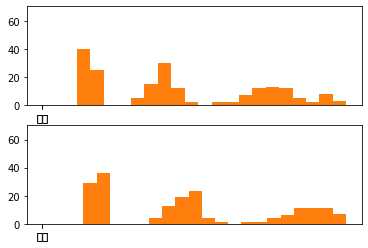

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getenv('HOME') + '/aiffel/data_preprocess/data/vgsales.csv'
sale = pd.read_csv(path)
print(sale)

trade_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(trade_path)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

patches = ax1.hist(trade['국가명'], bins=5, density=False)
patches = ax1.hist(trade['수출금액'], bins=20, density=False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

def z_score(df, col, z):
    return df[(abs(df[col] - df[col].mean())/df[col].std()) < z].index

trade_z = trade.loc[z_score(trade, '수출금액', 1.5)]

patches = ax2.hist(trade['국가명'], bins=5, density=False)
patches = ax2.hist(trade_z['수출금액'], bins=20, density=False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

In [42]:
len(sale) - sale.count()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
500,501,Call of Duty: Finest Hour,PS2,2004.0,Shooter,Activision,1.51,1.12,0.01,0.24,2.89
501,502,Zumba Fitness 2,Wii,2011.0,Sports,Majesco Entertainment,1.54,1.07,0.00,0.28,2.88
502,503,Syphon Filter,PS,1999.0,Shooter,Sony Computer Entertainment,2.03,0.72,0.02,0.11,2.88
503,504,Imagine: Babyz,DS,2007.0,Simulation,Ubisoft,1.30,1.27,0.00,0.31,2.88


In [52]:
q3, q1 = np.percentile(sale['Global_Sales'], [75, 25])
iqr = q3 - q1
print(sale[(q1-iqr*1.5 < sale['Global_Sales']) | (sale['Global_Sales'] < q3+iqr*1.5)])
print(trade)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

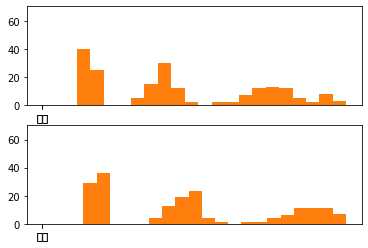

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

patches = ax1.hist(trade['국가명'], bins=5, density=False)
patches = ax1.hist(trade['수출금액'], bins=20, density=False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

def z_score(df, col, z):
    return df[(abs(df[col] - df[col].mean())/df[col].std()) < z].index

trade_z = trade.loc[z_score(trade, '수출금액', 1.5)]

patches = ax2.hist(trade['국가명'], bins=5, density=False)
patches = ax2.hist(trade_z['수출금액'], bins=20, density=False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')